<center><h2> Machine Learning algorithm on Most Streamed Spotify Songs 2023</h2></center>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("spotify-2023.csv",encoding='latin-1')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# Description of the dataset
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [4]:
# Info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### Handling missing values

In [5]:
# Check for missing values
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
# Change object type to int for columns
data['in_shazam_charts'] = data['in_shazam_charts'].str.replace(',','')
data['in_deezer_playlists'] = data['in_deezer_playlists'].str.replace(',','')

cols = ['streams', 'in_deezer_playlists', 'in_shazam_charts']
data[cols] = data[cols].apply(lambda x: pd.to_numeric(x, errors='coerce'))
# Fill missing values with mean
data['in_shazam_charts'].fillna(data['in_shazam_charts'].mean(),inplace=True)

# Fill the missing key values with mode - most frequent keys
data['key'].fillna(data['key'].mode()[0],inplace=True)

In [7]:
data.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 1
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [8]:
# Identifying the record with wrong value in streams
for r, v in enumerate(data['streams']):
    try:
        int(v)
    except:
        print('Incorrect value')
        print(f'row: {r}')
        print(f'value: {v}')

Incorrect value
row: 574
value: nan


In [9]:
data = data.drop(574)
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


In [10]:
# Check for null values after pe-processing the data
data.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

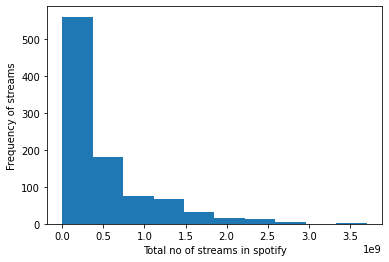

In [11]:
# The target variable streams has a right skewed distribution 
streams = data['streams']
plt.hist(streams)
plt.xlabel("Total no of streams in spotify")
plt.ylabel("Frequency of streams")
plt.show()

In [12]:
data.nunique()

track_name              942
artist(s)_name          644
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    878
in_spotify_charts        82
streams                 948
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        199
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [13]:
# Drop some columns
data= data.drop(['track_name','artist(s)_name'],axis=1)
data

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,141381703.0,43,263,45,...,125,B,Major,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,133716286.0,48,126,58,...,92,C#,Major,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,140003974.0,94,207,91,...,138,F,Major,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,800840817.0,116,207,125,...,170,A,Major,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,303236322.0,84,133,87,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,2022,11,3,953,0,91473363.0,61,13,37,...,144,A,Major,60,24,39,57,0,8,3
949,1,2022,10,21,1180,0,121871870.0,4,0,8,...,166,F#,Major,42,7,24,83,1,12,6
950,2,2022,11,3,573,0,73513683.0,2,0,7,...,92,C#,Major,80,81,67,4,0,8,6
951,3,2022,10,20,1320,0,133895612.0,29,26,17,...,97,C#,Major,82,67,77,8,0,12,5


#### Number of songs in the major and minor categories

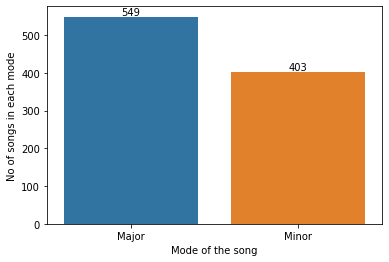

In [14]:
labels=['Major','Minor']
ax= sns.countplot(x='mode',data=data)
plt.xlabel("Mode of the song")
plt.ylabel("No of songs in each mode")
for container in ax.containers:
     ax.bar_label(container)     

#### Top 5 years of frequent releases of songs

<BarContainer object of 5 artists>

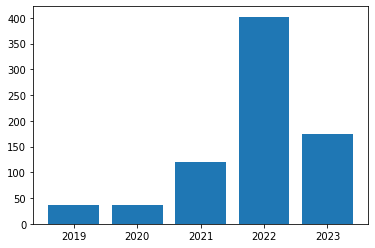

In [15]:
x=data['released_year'].value_counts().index[:5]
y= data['released_year'].value_counts().values[:5]
plt.bar(x,y)

### Label Encoding of variables

In [16]:
mode_val=data['mode'].value_counts()
print(mode_val)
key_val = data['key'].unique()

Major    549
Minor    403
Name: mode, dtype: int64


In [17]:
# Apply the mapping to create a new encoded column 'key_encoded'
key_mapping = {key: idx for idx, key in enumerate(key_val)}
data['key_encoded'] = data['key'].map(key_mapping)

In [18]:
# Apply the mapping to create a new encoded column for mode
data_mode={"Major":1,"Minor":0}
data['mode_encoded']= data['mode'].map(data_mode)
data.drop(['mode','key'],axis=1,inplace=True)
data.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded,mode_encoded
0,2,2023,7,14,553,147,141381703.0,43,263,45,...,125,80,89,83,31,0,8,4,0,1
1,1,2023,3,23,1474,48,133716286.0,48,126,58,...,92,71,61,74,7,0,10,4,1,1
2,1,2023,6,30,1397,113,140003974.0,94,207,91,...,138,51,32,53,17,0,31,6,2,1
3,1,2019,8,23,7858,100,800840817.0,116,207,125,...,170,55,58,72,11,0,11,15,3,1
4,1,2023,5,18,3133,50,303236322.0,84,133,87,...,144,65,23,80,14,63,11,6,3,0


In [19]:
correlation_matrix= data.corr() 

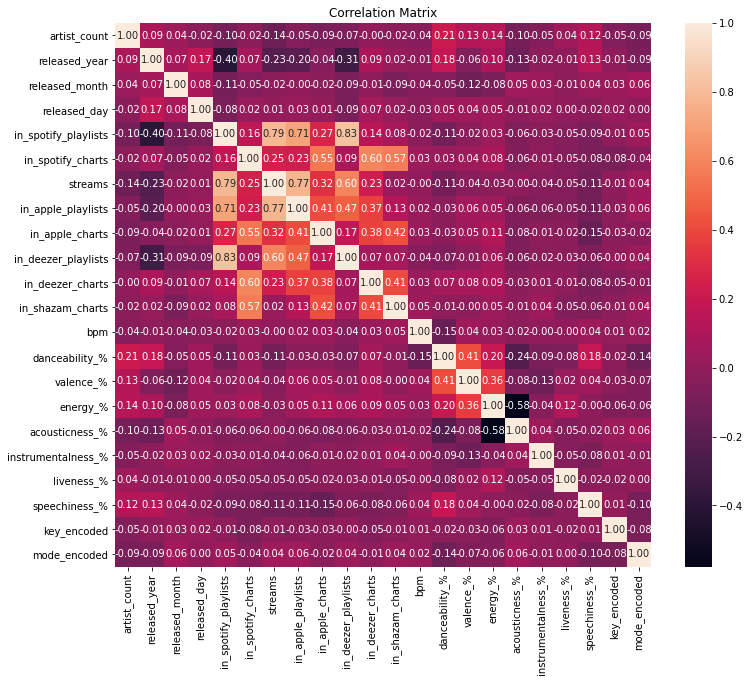

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Standardization of numerical variables

In [21]:
columns = numerical_columns = ['key_encoded','mode_encoded','released_year','in_spotify_playlists', 'in_spotify_charts','in_deezer_playlists',
                      'in_apple_playlists','streams', 'in_apple_charts','in_deezer_charts', 'in_shazam_charts', 'bpm', 
                'danceability_%','valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%']
df = data[columns].copy()
for column in columns:
    mean = df[column].mean()
    std = df[column].std()
    df[column + '_standardized'] = (df[column]  - mean) / std

# Drop the original numerical columns if needed
df = df.drop(columns, axis=1)
df

,key_encoded_standardized,mode_encoded_standardized,released_year_standardized,in_spotify_playlists_standardized,in_spotify_charts_standardized,in_deezer_playlists_standardized,in_apple_playlists_standardized,streams_standardized,in_apple_charts_standardized,in_deezer_charts_standardized,in_shazam_charts_standardized,bpm_standardized,danceability_%_standardized,valence_%_standardized,energy_%_standardized,acousticness_%_standardized,instrumentalness_%_standardized,liveness_%_standardized,speechiness_%_standardized
0,-1.351492,0.856324,0.427842,-0.588448,6.892817,-0.301072,-0.287573,-0.657583,4.168310,1.214094,4.880404,0.087156,0.889584,1.601050,1.130889,0.150807,-0.188135,-0.744570,-0.619103
1,-1.018257,0.856324,0.427842,-0.471887,1.837259,-0.289578,-0.229750,-0.671106,1.462343,1.876548,2.051337,-1.088493,0.274464,0.408572,0.587362,-0.772213,-0.188135,-0.598780,-0.619103
2,-0.685022,0.856324,0.427842,-0.481632,5.156565,-0.260402,0.302223,-0.660014,3.062222,1.876548,5.664131,0.550290,-1.092470,-0.826494,-0.680868,-0.387622,-0.188135,0.932014,-0.417397
3,-0.351787,0.856324,0.064582,0.336071,4.492704,-0.230343,0.556645,0.505777,3.062222,1.545321,3.109051,1.690314,-0.819084,0.280807,0.466578,-0.618377,-0.188135,-0.525885,0.490282
4,-0.351787,-1.166556,0.427842,-0.261924,1.939391,-0.263939,0.186577,-0.372053,1.600604,2.042162,2.325323,0.764045,-0.135617,-1.209790,0.949713,-0.502999,7.299329,-0.525885,-0.417397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,-0.351787,0.856324,0.337027,-0.537824,-0.613921,-0.308145,-0.079410,-0.745627,-0.769586,-0.276429,-0.382680,0.764045,-0.477350,-1.167202,-1.526354,1.150745,-0.188135,-0.744570,-0.719956
949,0.314683,0.856324,0.337027,-0.509095,-0.613921,-0.333784,-0.738593,-0.692001,-1.026356,-0.442042,-0.382680,1.547811,-1.707591,-1.891206,-2.432232,2.150684,-0.069287,-0.452990,-0.417397
950,-1.018257,0.856324,0.337027,-0.585917,-0.613921,-0.334668,-0.761723,-0.777310,-1.026356,-0.442042,-0.382680,-1.088493,0.889584,1.260342,0.164619,-0.887591,-0.188135,-0.744570,-0.417397
951,-1.018257,0.856324,0.337027,-0.491377,-0.613921,-0.325827,-0.449478,-0.670790,-0.512815,-0.442042,-0.382680,-0.910365,1.026278,0.664103,0.768537,-0.733754,-0.188135,-0.452990,-0.518250


In [22]:
features=["streams_standardized","in_apple_playlists_standardized" ,  "in_spotify_charts_standardized","in_spotify_playlists_standardized",
 "energy_%_standardized", "acousticness_%_standardized", "in_deezer_charts_standardized"]

df2 = df[features].copy()
data = np.c_[np.ones(df2.shape[0]), df2]

In [23]:
df2

,streams_standardized,in_apple_playlists_standardized,in_spotify_charts_standardized,in_spotify_playlists_standardized,energy_%_standardized,acousticness_%_standardized,in_deezer_charts_standardized
0,-0.657583,-0.287573,6.892817,-0.588448,1.130889,0.150807,1.214094
1,-0.671106,-0.229750,1.837259,-0.471887,0.587362,-0.772213,1.876548
2,-0.660014,0.302223,5.156565,-0.481632,-0.680868,-0.387622,1.876548
3,0.505777,0.556645,4.492704,0.336071,0.466578,-0.618377,1.545321
4,-0.372053,0.186577,1.939391,-0.261924,0.949713,-0.502999,2.042162
...,...,...,...,...,...,...,...
948,-0.745627,-0.079410,-0.613921,-0.537824,-1.526354,1.150745,-0.276429
949,-0.692001,-0.738593,-0.613921,-0.509095,-2.432232,2.150684,-0.442042
950,-0.777310,-0.761723,-0.613921,-0.585917,0.164619,-0.887591,-0.442042
951,-0.670790,-0.449478,-0.613921,-0.491377,0.768537,-0.733754,-0.442042


In [24]:
split_ratio=0.8
split_index = int(split_ratio * len(data))

In [25]:
#Split the data into train and test sets
X= df2.drop(['streams_standardized'],axis=1)
Y= df2['streams_standardized'].values.reshape(-1,1)
X_train,X_test = X[:split_index],X[split_index:]
Y_train,Y_test = Y[:split_index],Y[split_index:]

In [26]:
weights = np.zeros((X_train.shape[1], 1))
learning_rate = 0.01
epochs = 1000
lambda_value = 0.1

### Simple Linear regression model

In [27]:
# Simple Linear model
def simple_linear_regression(X, y):
    # Adding a column of ones to X for the intercept term
    X = np.c_[np.ones(X.shape[0]), X]
    # Calculate the parameters
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return theta

def predict1(X, theta):
    X = np.c_[np.ones(X.shape[0]), X]
    predictions = X @ theta
    return predictions

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Train the simple linear model
theta = simple_linear_regression(X_train, Y_train)

# Make predictions
y_pred = predict1(X_test, theta)

mse_test = mean_squared_error(Y_test, y_pred)
mae = np.mean(np.abs(Y_test - y_pred))
rmse = np.sqrt(mse_test)
r_squared = 1 - (np.sum((Y_test - y_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2))

print("Mean Squared Error (test set):", mse_test)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r_squared}")

Mean Squared Error (test set): 0.09493537167288428
Mean Absolute Error (MAE): 0.23444070354961832
Root Mean Squared Error (RMSE): 0.30811584132089714
R-squared (R²) Score: 0.5770770194886226


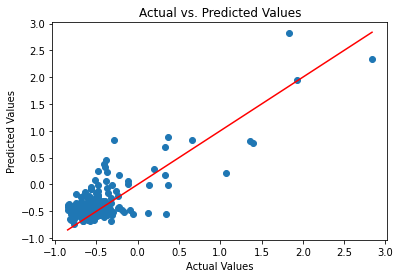

In [28]:
# Visualizing the actual vs. predicted values
plt.scatter(Y_test, y_pred)
values = np.linspace(min(min(Y_test), min(y_pred)), max(max(Y_test), max(y_pred)))
plt.plot(values, values, 'r')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Linear model with gradient descent

In [29]:
# Adding gradient descent to the model
def predict2(X, weights):
    return X @ weights

def mean_squared_error2(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        predictions = predict2(X, weights)
        errors = predictions - y
        gradient = (1 / m) * X.T @ errors
        weights -= learning_rate * gradient

        cost = mean_squared_error(y, predictions)
        cost_history.append(cost)

    return weights, cost_history

# Train the model using gradient descent
final_weights, cost_list = gradient_descent(X_train, Y_train, weights, learning_rate, epochs)

# Predict using the trained model
pred = predict2(X_test, final_weights)

# Evaluation metrics of model
mse1 = mean_squared_error2(Y_test, pred).item()
mae1 = np.mean(np.abs(Y_test - pred)).item()
rmse1 = np.sqrt(mse1).item()
r_squared1 = 1 - (np.sum((Y_test - pred)**2) / np.sum((pred - np.mean(pred))**2)).item()

print(f"Mean Squared Error (MSE): {mse1}")
print(f"Mean Absolute Error (MAE): {mae1}")
print(f"Root Mean Squared Error (RMSE): {rmse1}")
print(f"R-squared (R²) Score: {r_squared1}")

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error (MSE): 0.08928615067783462
Mean Absolute Error (MAE): 0.22407563865407173
Root Mean Squared Error (RMSE): 0.2988078825563921
R-squared (R²) Score: 0.5776800516558471


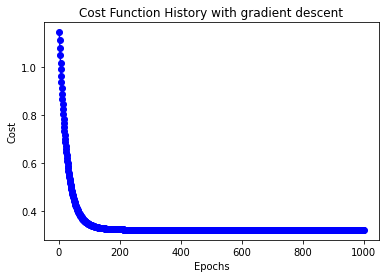

In [30]:
def linearModel2_plot():
    plt.plot(range(1, epochs+1), cost_list, marker='o', linestyle='-', color='b')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost Function History with gradient descent')
    plt.show()

#plot the cost function history for the model
linearModel2_plot()

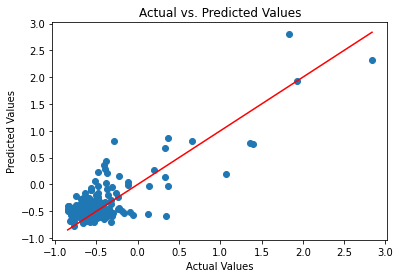

In [31]:
# Visualize the actual vs. predicted values
plt.scatter(Y_test, pred)
values2 = np.linspace(min(min(Y_test), min(pred)), max(max(Y_test), max(pred)))
plt.plot(values2, values2, 'r')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Linear model with gradient descent and L1 regularization

In [32]:
def predict3(X, weights):
    return np.dot(X, weights)

def mean_squared_error3(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def l1_regularization(weights, lambda_value):
    return lambda_value * np.sum(weights[1:])

def cost_function_with_l1(X, y, weights, lambda_value):
    m = len(y)
    predictions = X @ weights
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2) + l1_regularization(weights, lambda_value)
    return cost

def gradient_descent_with_l1(X, y, weights, learning_rate, epochs, lambda_value):
    m = len(y)
    cost_val = []

    for epoch in range(epochs):
        predictions = X @ weights
        errors = predictions - y
        gradients = (1 / m) * X.T @ errors + (lambda_value / m) * np.sign(weights)
        weights -= learning_rate * gradients

        cost = cost_function_with_l1(X, y, weights, lambda_value)
        cost_val.append(cost)

    return weights, cost_val

In [33]:
# Train the model using gradient descent with L1 regularization
weights_trained, cost_val = gradient_descent_with_l1(X_train, Y_train, weights, learning_rate, epochs, lambda_value)

Y_pred = predict3(X_test, weights_trained)

# Evaluate the model
mse2 = mean_squared_error3(Y_test, Y_pred)
mae2 = np.mean(np.abs(Y_test - Y_pred))
rmse2 = np.sqrt(mse2)
r_squared2 = 1 - (np.sum((Y_test - Y_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2))

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse2}")
print(f"Mean Absolute Error (MAE): {mae2}")
print(f"Root Mean Squared Error (RMSE): {rmse2}")
print(f"R-squared (R²) Score: {r_squared2}")

Mean Squared Error (MSE): 0.08930576697051248
Mean Absolute Error (MAE): 0.22410070880926794
Root Mean Squared Error (RMSE): 0.2988407050093954
R-squared (R²) Score: 0.6021560722997465


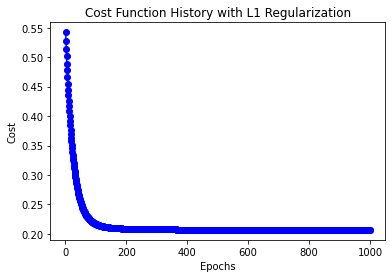

In [34]:
def linearModel3_plot():
    plt.plot(range(1, epochs+1), cost_val, marker='o', linestyle='-', color='b')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost Function History with L1 Regularization')
    plt.show()

# Plot of the cost function history for the final model
linearModel3_plot()

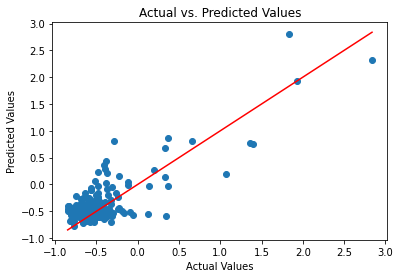

In [35]:
# Visualize the actual vs. predicted values
plt.scatter(Y_test, Y_pred)
values1 = np.linspace(min(min(Y_test), min(Y_pred)), max(max(Y_test), max(Y_pred)))
plt.plot(values1, values1, 'r')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Q2 E) Plot showing learning curve for an underfitting classification model

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


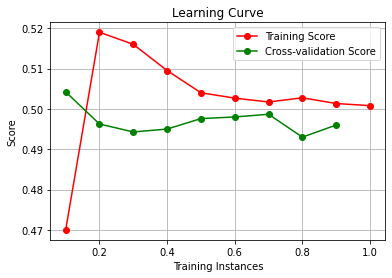

In [36]:
# Creating a binary classification dataset (hypothetical data)
np.random.seed(35)
n_samples = 5000
n_features = 20
X = np.random.randn(n_samples, n_features)
y = np.random.choice([0, 1], size=n_samples)

# Simple linear model - binary classification
def model(X, w):
    return np.dot(X, w) > 0

# Initializing weights
w = np.random.randn(n_features)

# Calculate the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
val_scores = []

# Iterate through different training instances
for train_size in train_sizes:
    split = int(train_size * n_samples)
    X_train, X_val = X[:split], X[split:]
    y_train, y_val = y[:split], y[split:]

    # Model training
    # Here keep the weights consistent across different training sizes
    _ = model(X_train, w)
    
    # Calculate scores
    train_score = np.mean(model(X_train, w) == y_train)
    val_score = np.mean(model(X_val, w) == y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

# Plot learning curve 
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Instances")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, val_scores, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")
plt.show()